3.3.1


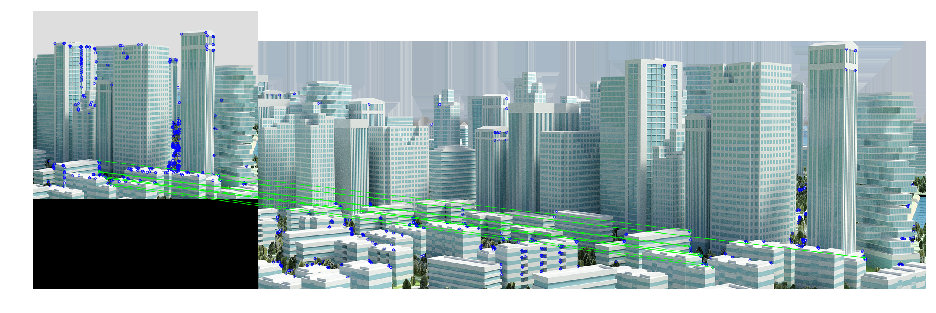

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
print(cv2.__version__)
%matplotlib inline 

def _compute_orb_keypoints(filename):
    """
    Takes in filename to read and computes ORB keypoints
    Returns image, keypoints and descriptors 
    """

    img = cv2.imread(filename)
    # create orb object
    orb = cv2.ORB_create()
    
    # set parameters 
    orb.setScoreType(cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)
    orb.setWTA_K(3)
    
    kp = orb.detect(img,None)

    kp, des = orb.compute(img, kp)
    return img,kp,  des


def _draw_keyp(img, kp):
    """
    Draws color around keypoint pixels
    """
    cv2.drawKeypoints(img,kp,img, color=(255,0,0), flags=2) 
    return img


def _plot_orb(filename):
    """
    Plots ORB keypoints from filename
    """
    img,kp, des = _compute_orb_keypoints(filename)
    img = _draw_keyp(img, kp)
    plot_img(img)


def _plot_img(img):
    """
    Generic plotting of opencv image
    """
    fig = plt.figure(figsize=(16,12))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def _compute_img_matches(filename1, filename2, thres=10):
    """
    Extracts ORB features from given filenames
    Computes ORB matches and plot them side by side 
    """
    img1, kp1, des1 = _compute_orb_keypoints(filename1)
    img2, kp2, des2 = _compute_orb_keypoints(filename2)
    
    matches = _brute_force_matcher(des1, des2)
    _draw_matches(img1, img2, kp1, kp2, matches, thres)
    
def _brute_force_matcher(des1, des2):
    """
    Brute force matcher to match ORB feature descriptors
    """
    # create BFMatcher object
    bf = cv2.BFMatcher(cv2.NORM_HAMMING2, crossCheck=True)
    # Match descriptors.
    matches = bf.match(des1,des2)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    return matches

def _draw_matches(img1, img2, kp1, kp2, matches, thres=10):
    """
    Utility function to draw lines connecting matches between two images.
    """
    draw_params = dict(matchColor = (0,255,0),
                       singlePointColor = (255,0,0),
                       flags = 0)

    # Draw first thres matches.
    img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:thres],None, **draw_params)
    _plot_img(img3)



def main():
    # read an image 
    filename1 = 'pics/crop-building.png'
    filename2 = 'pics/building.png'

    _compute_img_matches(filename1, filename2)
   


if __name__ == '__main__':
    main()
